# Experiment-5

## Aim: Edge Detction using Scharr, Canny and Laplacian Operators

### Theory:
### Scharr Operator:

The Scharr operator is an advanced edge-detection operator in OpenCV, specifically designed to enhance the accuracy of gradient calculations in images. It is a variation of the Sobel operator but with better rotational symmetry and higher precision in the computation of image gradients.


1. Edge Detection:

  The primary goal of the Scharr operator is to detect edges in images. Edges are significant transitions in pixel intensity, representing boundaries of objects within an image. Accurate edge detection is crucial in various image processing tasks such as object recognition, image segmentation, and feature extraction.

2. Gradient Computation:
  
  The Scharr operator computes the first-order derivatives (gradients) of an image. These gradients measure the rate of change of pixel intensities in the horizontal (x) and vertical (y) directions. The gradients are essential for identifying edge strength and direction.

3. Improved Accuracy:
  
  Compared to the Sobel operator, the Scharr operator provides a more accurate approximation of the derivatives, especially for images with high-frequency content or noise. This improvement is achieved by using different kernel coefficients that emphasize central differences, thereby reducing errors.

### Canny Operator:

Canny Edge Detection is a popular edge detection algorithm. It was developed by John F. Canny in

1. It is a multi-stage algorithm and we will go through each stages.
2. Noise Reduction
  
  Since edge detection is susceptible to noise in the image, first step is to remove the noise in the image with a 5x5 Gaussian filter. We have already seen this in previous chapters.

3. Finding Intensity Gradient of the Image

  Smoothened image is then filtered with a Sobel kernel in both horizontal and vertical direction to get first derivative in horizontal direction (Gx) and vertical direction (Gy). From these two images, we can find edge gradient and direction for each pixel as follows:

  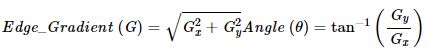

Gradient direction is always perpendicular to edges. It is rounded to one of four angles representing vertical, horizontal and two diagonal directions.

1. Non-maximum Suppression

  After getting gradient magnitude and direction, a full scan of image is done to remove any unwanted pixels which may not constitute the edge. For this, at every pixel, pixel is checked if it is a local maximum in its neighborhood in the direction of gradient. Check the image below:
  
  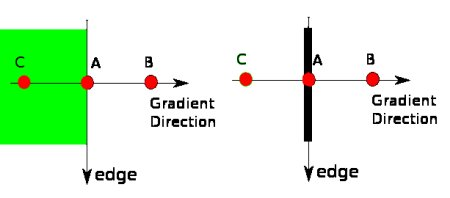

  Point A is on the edge ( in vertical direction). Gradient direction is normal to the edge. Point B and C are in gradient directions. So point A is checked with point B and C to see if it forms a local maximum. If so, it is considered for next stage, otherwise, it is suppressed ( put to zero).

  In short, the result you get is a binary image with "thin edges".

1. Hysteresis Thresholding

  This stage decides which are all edges are really edges and which are not. For this, we need two threshold values, minVal and maxVal. Any edges with intensity gradient more than maxVal are sure to be edges and those below minVal are sure to be non-edges, so discarded. Those who lie between these two thresholds are classified edges or non-edges based on their connectivity. If they are connected to "sure-edge" pixels, they are considered to be part of edges. Otherwise, they are also discarded. See the image below:

  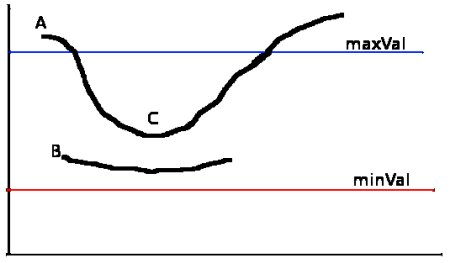

  The edge A is above the maxVal, so considered as "sure-edge". Although edge C is below maxVal, it is connected to edge A, so that also considered as valid edge and we get that full curve. But edge B, although it is above minVal and is in same region as that of edge C, it is not connected to any "sure-edge", so that is discarded. So it is very important that we have to select minVal and maxVal accordingly to get the correct result.

  This stage also removes small pixels noises on the assumption that edges are long lines.

  So what we finally get is strong edges in the image.


### Laplacial Operator:

Laplacian Operator is also a derivative operator which is used to find edges in an image. The major difference between Laplacian and other operators like Prewitt, Sobel, Robinson and Kirsch is that these all are first order derivative masks but Laplacian is a second order derivative mask. In this mask we have two further classifications one is Positive Laplacian Operator and other is Negative Laplacian Operator.

1. Positive Laplacian Operator
  In Positive Laplacian we have standard mask in which center element of the mask should be negative and corner elements of mask should be zero.
  
  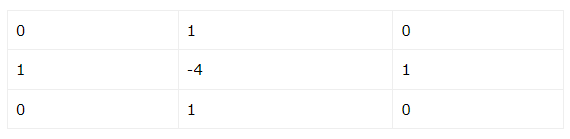

  Positive Laplacian Operator is use to take out outward edges in an image.

2. Negative Laplacian Operator
  
  In negative Laplacian operator we also have a standard mask, in which center element should be positive. All the elements in the corner should be zero and rest of all the elements in the mask should be -1.

  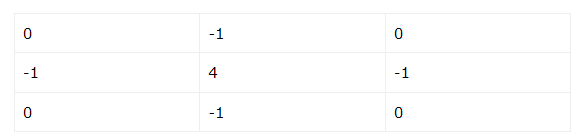

  

## Coding:

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [ ]:
img = cv2.imread('/content/drive/MyDrive/CVR_LAB_FILE/DATASET_Image/edge_image.png')

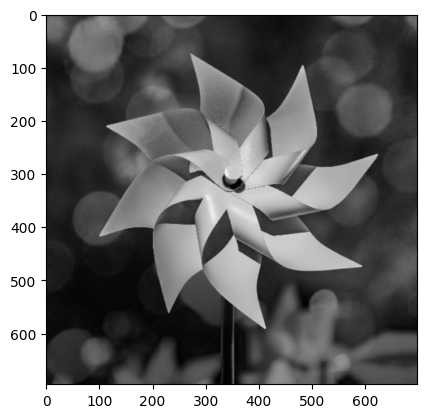

In [ ]:
img= cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img, cmap='gray')

### Edge detection using Scharr operator

In [ ]:
#Calculate gradient using the scharr operator
gradient_x2=cv2.Scharr(img, cv2.CV_32F,1,0)
gradient_y2=cv2.Scharr(img, cv2.CV_32F,0,1)

In [ ]:
#Calculate the magnitude of the gradients
gradient_magnitude2=cv2.magnitude(gradient_x2,gradient_y2)

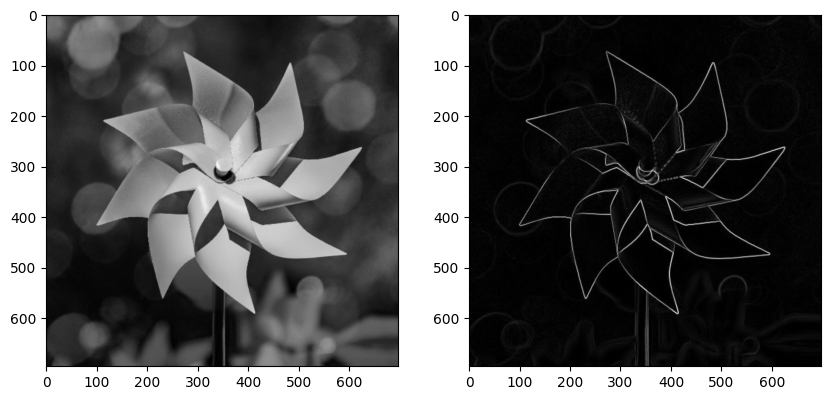

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(img, cmap='gray')
plt.subplot(122)
plt.imshow(gradient_magnitude2, cmap='gray')

### Edge detection using canny operator

In [ ]:
edges_canny=cv2.Canny(img,threshold1=80,threshold2=150)

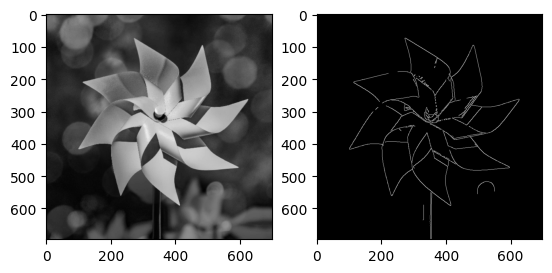

In [ ]:
plt.subplot(121)
plt.imshow(img, cmap='gray')
plt.subplot(122)
plt.imshow(edges_canny, cmap='gray')

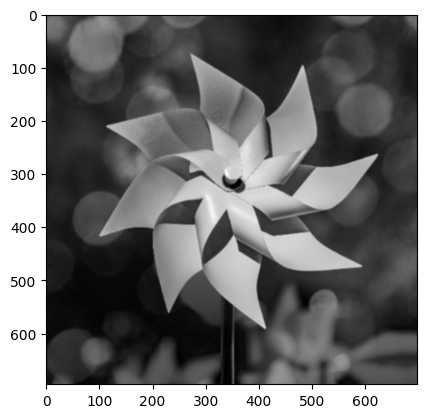

In [ ]:
blurred_img=cv2.blur(img,ksize=(3,3))
plt.imshow(blurred_img, cmap='gray')

In [ ]:
median_val=np.median(blurred_img)
median_val

59.0

In [ ]:
lower_threshold=int(max(0,(0.7)*median_val))+30
lower_threshold

71

In [ ]:
upper_threshold=int(min(255,(1.3)*median_val))+50
upper_threshold

126

In [ ]:
edges2_canny=cv2.Canny(blurred_img,lower_threshold,upper_threshold)

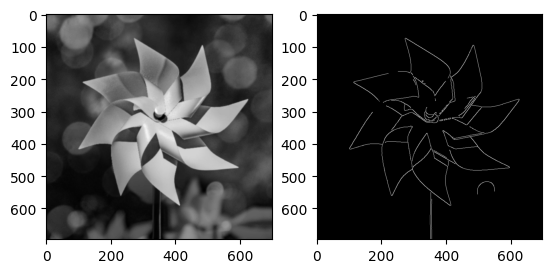

In [ ]:
plt.subplot(121)
plt.imshow(blurred_img, cmap='gray')
plt.subplot(122)
plt.imshow(edges2_canny, cmap='gray')

### Edge detection using Laplacial diagonal operator

In [ ]:
#Define the Laplacian kernels
Lap_kernel=np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]],dtype=np.float32)

In [ ]:
#Apply Laplacian edge detection
laplacian=cv2.filter2D(img,cv2.CV_32F,Lap_kernel)

In [ ]:
laplacian=np.uint8(np.absolute(laplacian))

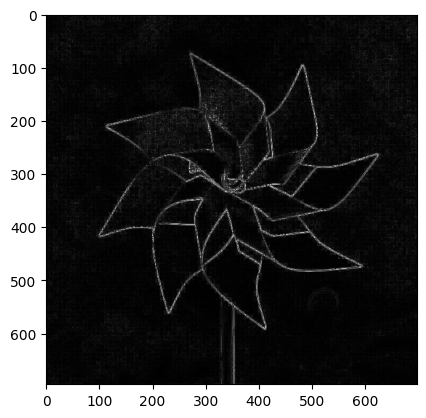

In [ ]:
plt.imshow(laplacian,cmap='gray')

In [ ]:
#apply threshold to highlight edges
threshold_value=60
edges=(laplacian>threshold_value)
edges[laplacian >=threshold_value]=255
edges[laplacian<threshold_value]=0

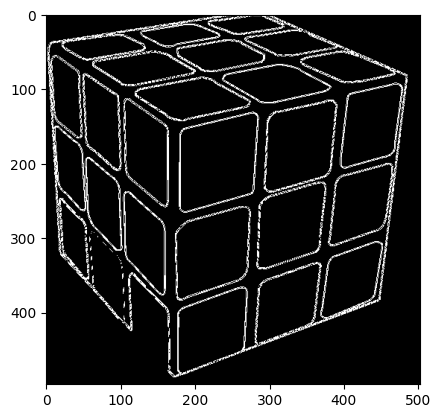

In [ ]:
plt.imshow(edges,cmap='gray')

# Task

1.   Import "fruit.png" and "edge_image_detection" image
2.   convert image into RGB color channel
3. Convert image into grayscale channel.
4. Use Scharr edge detetction for edge detection anf display image by using gradient magnitude directly
5. Use Canny edge detection for edge detection and display image by using gradient magnitude directly.
6. Use laplacian edge detection using laplacial diagonal kernel by defining proper threshold



## 1

In [ ]:
img1 = cv2.imread('/content/drive/MyDrive/CVR_LAB_FILE/DATASET_Image/fruit.png')
img2=cv2.imread('/content/drive/MyDrive/CVR_LAB_FILE/DATASET_Image/edge_image_detection.png')

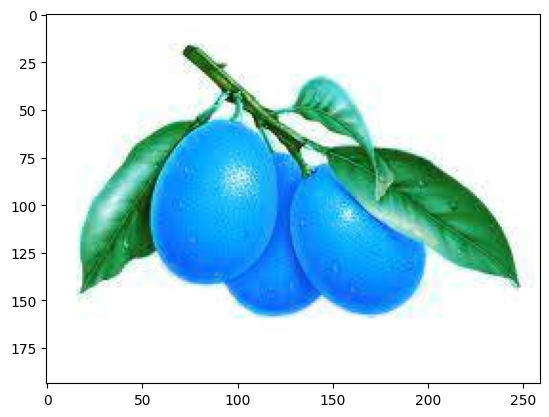

In [ ]:
plt.imshow(img1)

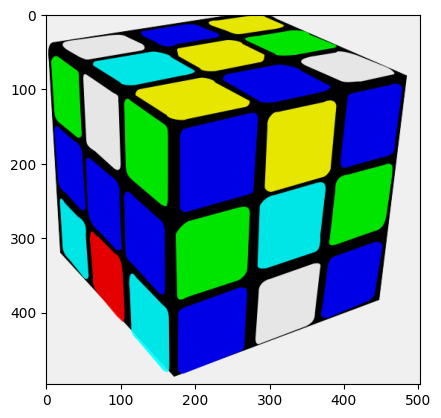

In [ ]:
plt.imshow(img2)

## 2

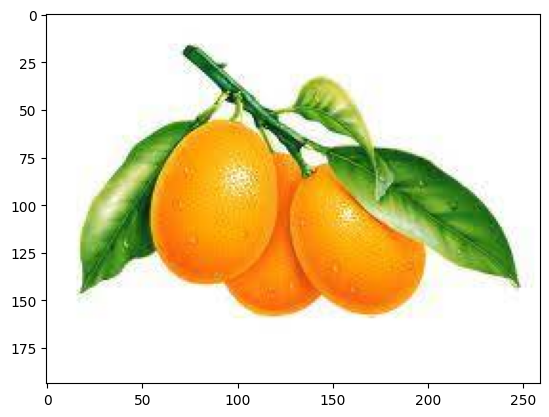

In [ ]:
img1_rgb= cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
plt.imshow(img1_rgb)

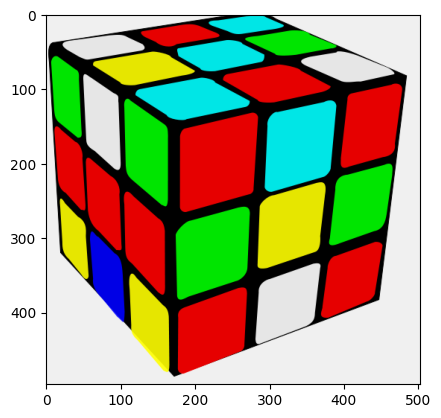

In [ ]:
img2_rgb= cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
plt.imshow(img2_rgb)

## 3

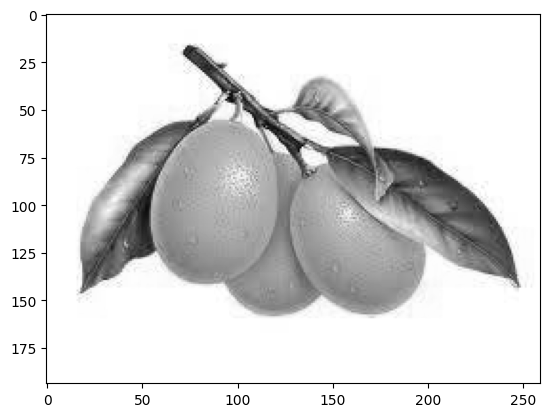

In [ ]:
img1_gray= cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
plt.imshow(img1_gray, cmap='gray')

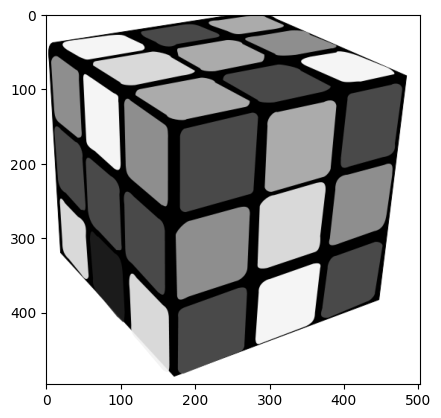

In [ ]:
img2_gray= cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
plt.imshow(img2_gray, cmap='gray')

## 4

### Image 1

In [ ]:
gradient_x2=cv2.Scharr(img1_gray, cv2.CV_32F,1,0)
gradient_y2=cv2.Scharr(img1_gray, cv2.CV_32F,0,1)

In [ ]:
gradient_magnitude2=cv2.magnitude(gradient_x2,gradient_y2)

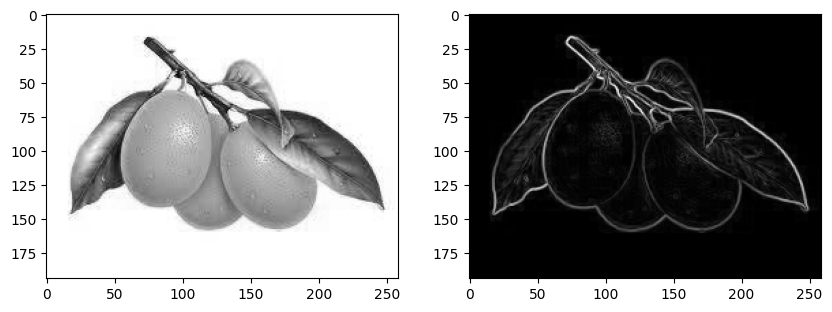

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(img1_gray, cmap='gray')
plt.subplot(122)
plt.imshow(gradient_magnitude2, cmap='gray')

### Image 2

In [ ]:
gradient_x2=cv2.Scharr(img2_gray, cv2.CV_32F,1,0)
gradient_y2=cv2.Scharr(img2_gray, cv2.CV_32F,0,1)

In [ ]:
gradient_magnitude2=cv2.magnitude(gradient_x2,gradient_y2)

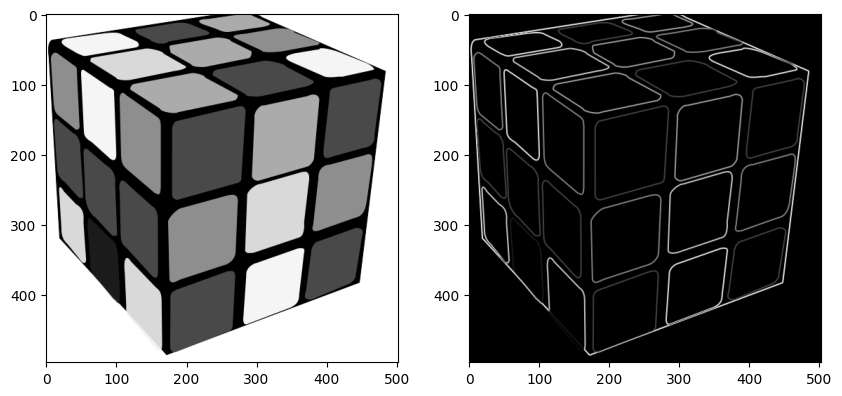

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(img2_gray, cmap='gray')
plt.subplot(122)
plt.imshow(gradient_magnitude2, cmap='gray')

## 5

### Image 1

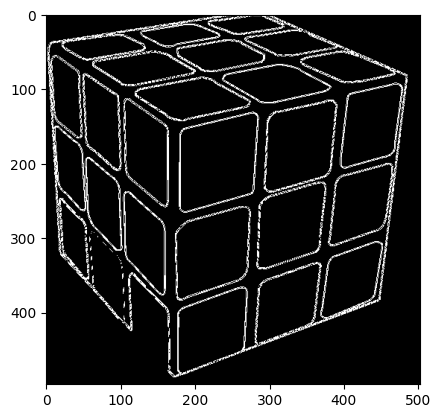

In [ ]:
edges1 = cv2.Canny(img1_gray, 100, 200)
plt.imshow(edges, cmap ='gray')

### Image 2

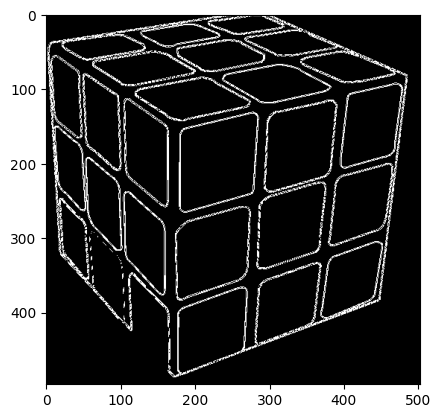

In [ ]:
edges2 = cv2.Canny(img2_gray, 100, 200)
plt.imshow(edges, cmap ='gray')

## 6

### Image 1

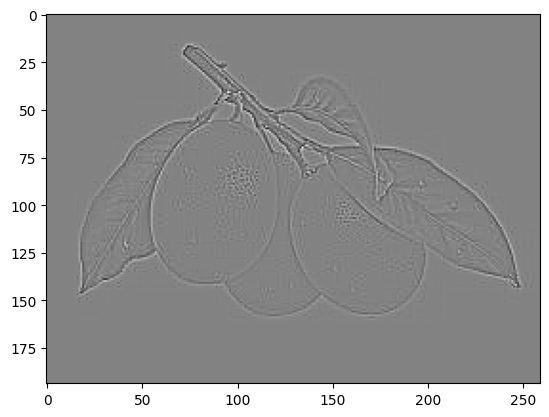

In [ ]:
kernel_1 = np.array([[-1, -1, -1], [-1, 8 ,-1], [-1, -1, -1]], dtype = np.float32)
laplacian_diagonal_1 = cv2.filter2D(img1_gray, cv2.CV_32F, kernel_1)
plt.imshow(laplacian_diagonal_1, cmap ='gray')

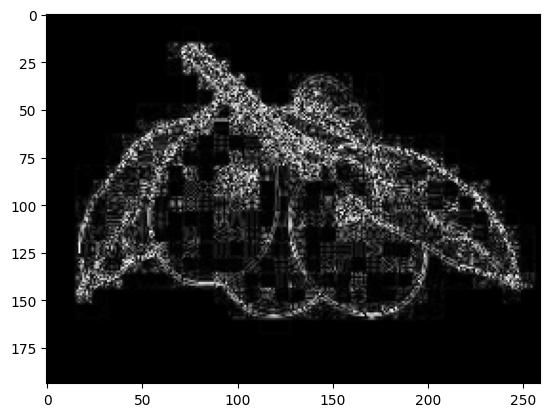

In [ ]:
laplacian = np.uint8(np.absolute(laplacian_diagonal_1))
plt.imshow(laplacian, cmap ='gray')

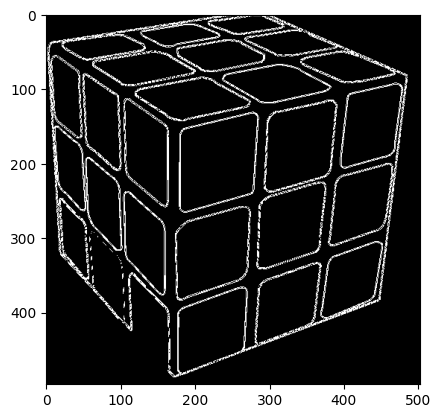

In [ ]:
threshold_value = 60
edges[laplacian > threshold_value] = 255
edges[laplacian < threshold_value] = 0
plt.imshow(edges, cmap ='gray')

### Image 2

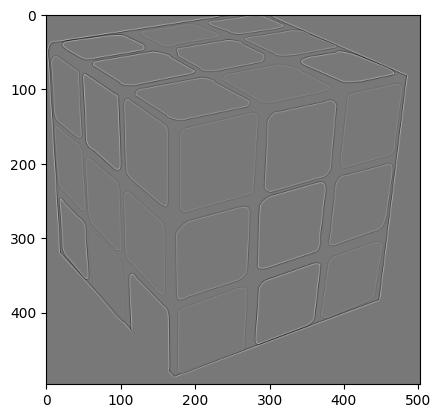

In [ ]:
kernel_1 = np.array([[-1, -1, -1], [-1, 8 ,-1], [-1, -1, -1]], dtype = np.float32)
laplacian_diagonal_1 = cv2.filter2D(img2_gray, cv2.CV_32F, kernel_1)
plt.imshow(laplacian_diagonal_1, cmap ='gray')

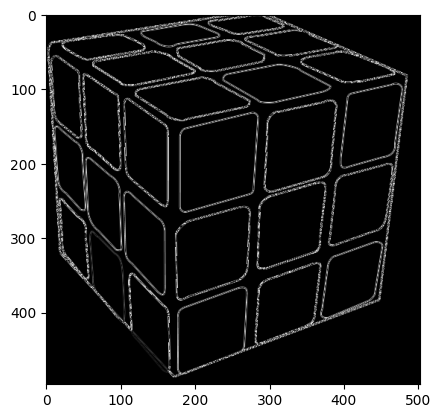

In [ ]:
laplacian = np.uint8(np.absolute(laplacian_diagonal_1))
plt.imshow(laplacian, cmap ='gray')

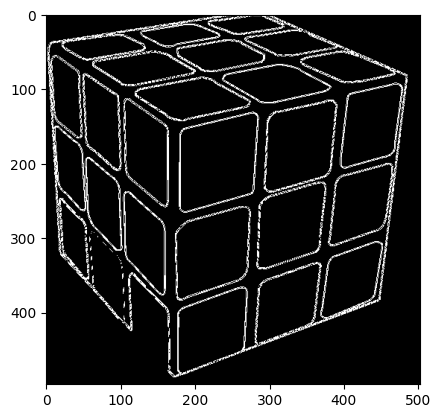

In [ ]:
threshold_value = 60
edges2[laplacian >= threshold_value] = 255
edges2[laplacian < threshold_value] = 0
plt.imshow(edges2, cmap ='gray')

# Conclusion:
Edge detection is a fundamental image processing technique in computer vision. Using Python and OpenCV, methods such as the Scharr, Canny, and Laplacian operators can significantly enhance image analysis by identifying the boundaries and edges within an image. The efficacy of these methods can be assessed through experiments involving their systematic application and analysis.






